In [100]:
# download & unzip files (for windows user you have to manually downlad and extract files)
# make sure the extracted folder img_test & img_train contain list of images only

! wget -q https://github.com/CISC-372/Notebook/releases/download/a3/test.zip -O test.zip
! wget -q https://github.com/CISC-372/Notebook/releases/download/a3/train.zip -O train.zip
! wget -q https://github.com/CISC-372/Notebook/releases/download/a3/y_train.csv -O y_train.csv
! unzip -q test.zip
! unzip -q train.zip

In [102]:
from tqdm import tqdm
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import os
import numpy as np


def load_data(folder):
    images = []
    for file in tqdm(os.listdir(folder)):
        file_id = file.replace('.png', '')
        image = Image.open(
            os.path.join(folder, file)
        ).convert('RGBA').resize((256, 256))
        arr = np.array(image)
        images.append(
            (int(file_id), arr)
        )
    images.sort(key=lambda i: i[0])
    return np.array([v for _id, v in images])



x_train = load_data('train')
y_train = pd.read_csv('y_train.csv')['infection']

  0%|          | 0/487 [00:00<?, ?it/s]

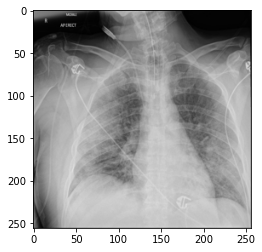

In [106]:
# check image loading
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Input

def build():
    img_in = Input(shape=(256, 256, 4))
    flattened = Flatten()(img_in)
    fc1 = Dense(64)(flattened)
    #fc1 = Dropout(0.3)(fc1)
    fc2 = Dense(32)(fc1)
    #fc2 = Dropout(0.3)(fc2)
    output = Dense(1, activation = 'sigmoid')(fc2)
    model = tf.keras.Model(inputs=img_in, outputs=output)
    return model


model = build()
model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=['BinaryAccuracy', 'AUC']
        )

model.summary()



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 4)]     0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 262144)            0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16777280  
_________________________________________________________________
dense_47 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 16,779,393
Trainable params: 16,779,393
Non-trainable params: 0
_________________________________________________________________


In [112]:
epochs = 30
batch_size = 64

history = model.fit(x = x_train,
                    y = y_train,
                    batch_size = batch_size,
                    validation_split=0.3,
                    epochs=epochs
                    )

Epoch 1/30
6/6 [==============================] - 4s 284ms/step - loss: 108915.7943 - binary_accuracy: 0.5751 - auc: 0.5283 - val_loss: 29786.5137 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 2/30
6/6 [==============================] - 1s 104ms/step - loss: 60833.6565 - binary_accuracy: 0.4877 - auc: 0.4920 - val_loss: 33527.8516 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 3/30
6/6 [==============================] - 0s 83ms/step - loss: 23083.4704 - binary_accuracy: 0.6255 - auc: 0.5121 - val_loss: 12108.1543 - val_binary_accuracy: 0.6531 - val_auc: 0.5000
Epoch 4/30
6/6 [==============================] - 0s 94ms/step - loss: 16497.1057 - binary_accuracy: 0.6809 - auc: 0.5034 - val_loss: 18339.8262 - val_binary_accuracy: 0.3469 - val_auc: 0.5000
Epoch 5/30
6/6 [==============================] - 1s 84ms/step - loss: 13126.3751 - binary_accuracy: 0.4676 - auc: 0.5139 - val_loss: 4796.7759 - val_binary_accuracy: 0.7075 - val_auc: 0.5922
Epoch 6/30
6/6 [=================

In [113]:
x_test = load_data('test')

y_test = model.predict(x_test)

y_test_df = pd.DataFrame()
y_test_df['id'] = np.arange(len(y_test))
y_test_df['infection'] = y_test.astype(float)
y_test_df.to_csv('submission.csv', index=False)



  0%|          | 0/210 [00:00<?, ?it/s]